In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from muon.deep_clustering.clustering import Config, Cluster
from muon.utils.subjects import Subjects
from muon.deep_clustering.mapping import Mapping

import os
import pickle
import math
import logging
import numpy as np
import pandas as pd
import csv
logger = logging.getLogger(__name__)

config = 'mnt/dec/dec_no_labels/config_jupyter.json'
config = Config.load(config)
print(config.__dict__)
subjects = pickle.load(open(config.subjects, 'rb'))
# cluster = Cluster.create(subjects, config)

import muon.project.parse_export as pe
agg = pe.Aggregate.load('mh2')

_s = list(agg.data['subjects'].keys())
subjects2 = subjects.subset(_s)
agg.apply_labels(subjects2)

def load_set(fname):
    with open(fname, 'r') as file:
        reader = csv.DictReader(file)
        return [int(item['subject']) for item in reader]
train = load_set('mnt/training_set/train.csv')
validate = load_set('mnt/training_set/test.csv')


Using TensorFlow backend.


{'batch_size': 256, 'ae_weights': 'mnt/dec/dec_no_labels/ae_weights.h5', 'lr': 0.01, 'update_interval': 140, 'maxiter': 20000.0, 'save_dir': 'mnt/dec/dec_no_labels', 'rotation': False, 'momentum': 0.9, 'nodes': [500, 500, 2000, 10], 'tol': 0.001, 'subjects': 'mnt/dec/dec_no_labels/subjects.pkl', 'n_clusters': 50}


Initializing model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 499)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               250000    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 50)                500       
Total params: 1,523,010
Trainable params: 1,523,010
Non-trainable params: 0
_______________________________________________

/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[ 0.  0.  0. ...,  0.  1.  1.] None
[ 0.  1.  0. ...,  0.  1.  1.] None


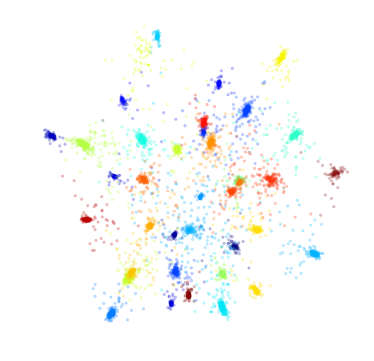

In [2]:
cluster = Cluster.create(subjects2, config)
print('Initializing model')
cluster.initialize()

kwargs = {'mode': 'weightedagg', 'batched': True, 'shuffle': True}
mapping = Mapping(cluster, agg, train, validate, **kwargs)
mapping.pca_plot()
plt.show()

/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


batching
3852 1000
batch 2
Train on 1000 samples, validate on 2474 samples
Epoch 1/10
1000/1000 [==============================] - 1s 909us/step - loss: 0.5834 - val_loss: 0.5728
Epoch 2/10
1000/1000 [==============================] - 0s 497us/step - loss: 0.5716 - val_loss: 0.5840
Epoch 3/10
1000/1000 [==============================] - 0s 498us/step - loss: 0.5642 - val_loss: 0.5899
Epoch 4/10
1000/1000 [==============================] - 0s 495us/step - loss: 0.5531 - val_loss: 0.5929
Epoch 5/10
1000/1000 [==============================] - 0s 489us/step - loss: 0.5427 - val_loss: 0.5973
Epoch 6/10
1000/1000 [==============================] - 0s 484us/step - loss: 0.5320 - val_loss: 0.5994
Epoch 7/10
1000/1000 [==============================] - 0s 488us/step - loss: 0.5169 - val_loss: 0.5987
Epoch 8/10
1000/1000 [==============================] - 0s 495us/step - loss: 0.5027 - val_loss: 0.6006
Epoch 9/10
1000/1000 [==============================] - 0s 499us/step - loss: 0.4899 - val_lo

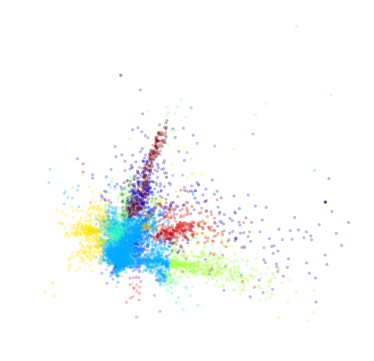

In [3]:
mapping.apply_mapping()
print(mapping.FOM)

pred=mapping.cluster.predict()
cm = pred.cluster_mapping
print(cm[cm['majority_class_fraction']>= 0])

mapping.pca_plot()
plt.show()

Initializing model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 499)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               250000    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 50)                500       
Total params: 1,523,010
Trainable params: 1,523,010
Non-trainable params: 0
_______________________________________________

/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[ 0.  0.  0. ...,  0.  1.  1.] None
[ 0.  1.  0. ...,  0.  1.  1.] None
not batching
batch 2
Train on 7423 samples, validate on 2474 samples
Epoch 1/10
7423/7423 [==============================] - 3s 384us/step - loss: 0.5927 - val_loss: 0.5876
Epoch 2/10
7423/7423 [==============================] - 2s 318us/step - loss: 0.5278 - val_loss: 0.5905
Epoch 3/10
7423/7423 [==============================] - 2s 312us/step - loss: 0.4829 - val_loss: 0.5886
Epoch 4/10
7423/7423 [==============================] - 2s 313us/step - loss: 0.4632 - val_loss: 0.5912
Epoch 5/10
7423/7423 [==============================] - 2s 311us/step - loss: 0.4478 - val_loss: 0.5902
Epoch 6/10
7423/7423 [==============================] - 2s 313us/step - loss: 0.4366 - val_loss: 0.5911
Epoch 7/10
7423/7423 [==============================] - 2s 312us/step - loss: 0.4291 - val_loss: 0.5950
Epoch 8/10
7423/7423 [==============================] - 2s 319us/step - loss: 0.4241 - val_loss: 0.5999
Epoch 9/10
7423/7423 [=====

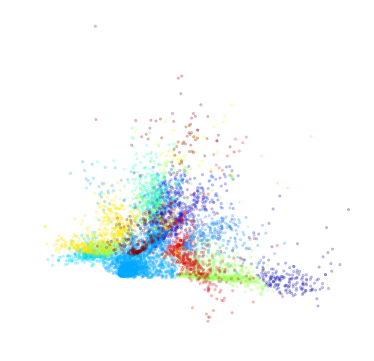

In [4]:
cluster = Cluster.create(subjects2, config)
print('Initializing model')
cluster.initialize()

kwargs = {'mode': 'aggregate', 'batched': False, 'shuffle': False}
mapping = Mapping(cluster, agg, train, validate, **kwargs)
mapping.apply_mapping()

print(mapping.FOM)
pred=mapping.cluster.predict()
cm = pred.cluster_mapping
print(cm[cm['majority_class_fraction']>= 0])

mapping.pca_plot()
plt.show()